In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

___* Understanding Dataset___

In [2]:
path='/content/drive/MyDrive/creditcard.csv'
Data=pd.read_csv(path)
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
Data_Frame=pd.DataFrame(Data)

In [4]:
Data_Frame.shape

(284807, 31)

In [5]:
Data_Frame.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
Data_Frame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


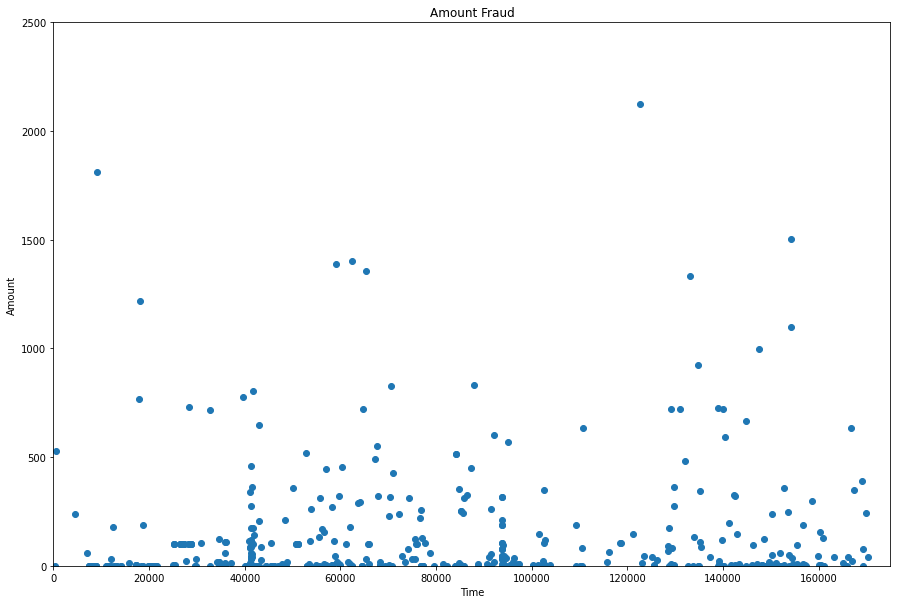

In [8]:
Data_fraud=Data_Frame[Data_Frame['Class']==1] # Recovery of Fraud data
plt.figure(figsize=(15,10))
plt.scatter(Data_fraud['Time'],Data_fraud['Amount']) # Display the fraud amounts according to their time
plt.title('Amount Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

__Observation : We notice, time doesn't impact the frequency of frauds. Moreover, the majority of frauds are small
amounts.__

In [9]:
Big_fraud=Data_fraud[Data_fraud['Amount']>1000].shape[0] # Recovery of frauds over 1000
print('There are only '+str(Big_fraud)+' frauds where the amount was bigger than 1000 over '+str(Data_fraud.shape[0])+' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


___* Unbalanced Data___

In [10]:
Fraud=len(Data[Data.Class==1])
No_fraud=len(Data[Data.Class ==0])
print('There are only '+str(Fraud)+' frauds in the original dataset, even though there are '+str(No_fraud)+' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


__* This data is unbalanced which means using the data as it is might result in unwanted behaviour from a
supervised classifier.To make it easy to understand if a classifier were to train with this data set trying to
achieve the best accuracy possible it would most likely label every transaction as a non-fraud.__

In [11]:
print("The accuracy of the classifier then would be : "+str((284315-492)/284315)+" which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


__* To answer this problem we could use the oversampling principle or the undersampling principle.The
undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.__

___* Correlation Features___

In [12]:
Data_corr=Data_Frame.corr() # Calculation of the correlation coefficients in pairs, with the default method:
# Pearson, Standard Correlation Coefficient

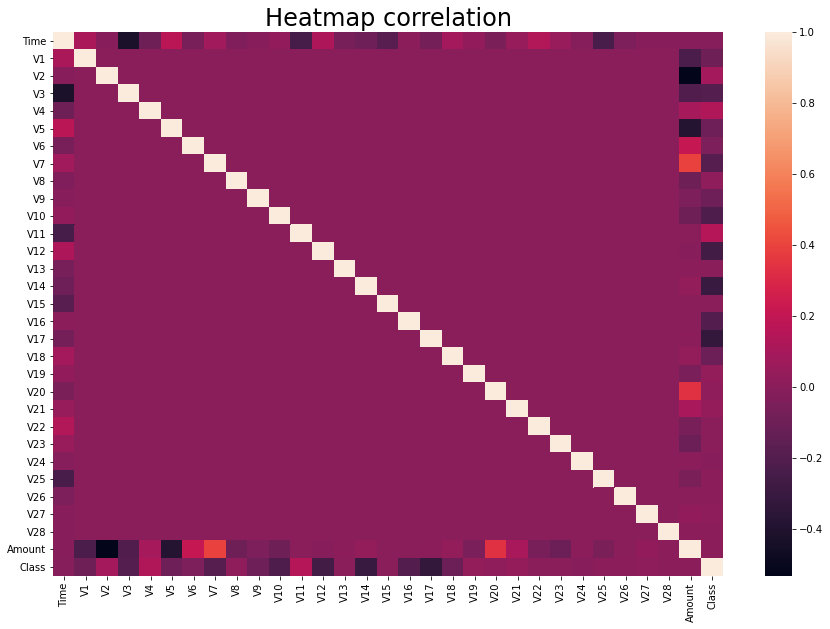

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(Data_corr) # Displaying the Heatmap
sns.set(font_scale=2,style='white')
plt.title('Heatmap correlation')
plt.show()

__* As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA
was previously performed on the data.__
 
__What can generally be done on a massive dataset is a dimension reduction. By picking the most important
dimensions, there is a possiblity of explaining most of the problem, thus gaining a considerable amount of time
while preventing the accuracy to drop too much.__
 
__However in this case given the fact that a PCA was previously performed, if the dimension reduction is effective
then the PCA wasn't computed in the most effective way. Another way to put it is that no dimension reduction
should be computed on a dataset on which a PCA was computed correctly.__

In [14]:
Rank=Data_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
Data_rank=pd.DataFrame(Rank)
Data_rank=np.abs(Data_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients in descending order
Data_rank.dropna(inplace=True) # Removing Missing Data (not a number)

___* Data Selection (Oversampling)___
 
__* One way to do oversampling is to replicate the under-presented class tuples until we attain a correct proportion
between the class.
However as we haven't infinite time nor the patience, we are going to run the classifier with the undersampled
training data(for those using the undersampling principle if results are really bad just rerun the training dataset
definition)__

In [15]:
#We seperate ours data in two groups : a train dataset and a test dataset
# First we build our train dataset
Data_train_all=Data[0:150000] # We cut in two the original dataset
Data_train_1=Data_train_all[Data_train_all['Class']==1] # We seperate the data which are the frauds and the no frauds
Data_train_0=Data_train_all[Data_train_all['Class']==0]
print('In this dataset, we have '+str(len(Data_train_1))+' frauds so we need to take a similar number of non-fraud')
Data_sample=Data_train_0.sample(300)
Data_train=Data_train_1.append(Data_sample) # We gather the frauds with the no frauds.
Data_train=Data_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [16]:
X_train=Data_train.drop(['Time','Class'],axis=1) # We drop the features Time (useless),and the Class (label)
y_train=Data_train['Class'] # We create our label
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)

In [17]:
# with all the test dataset to see if the model learn correctly
Data_test_all =Data[150000:]
X_test_all=Data_test_all.drop(['Time','Class'],axis=1)
y_test_all=Data_test_all['Class']
X_test_all=np.asarray(X_test_all)
y_test_all=np.asarray(y_test_all)

In [18]:
X_train_rank=Data_train[Data_rank.index[1:11]] # We take the first ten ranked features
X_train_rank=np.asarray(X_train_rank)

__* Then we define training and testing dataset after applying a dimension reduction to illustrate the fact that nothing
will be gained because a PCA was previously computed.__

In [19]:
# with all the test dataset to see if the model learn correctly
X_test_all_rank=Data_test_all[Data_rank.index[1:11]]
X_test_all_rank=np.asarray(X_test_all_rank)
y_test_all=np.asarray(y_test_all)

___* Confusion Matrix___

In [20]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [21]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm,classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt='d'
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

___* Model Selection___

In [22]:
classifier=svm.SVC(kernel='linear') 
# We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [23]:
classifier.fit(X_train,y_train)
# Then we train our model, with our balanced data train.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

___* Testing the Model___

In [24]:
prediction_SVM_all=classifier.predict(X_test_all)
#And finally, we predict our data test.

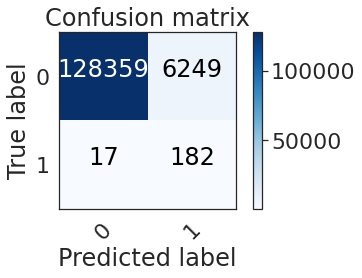

In [25]:
cm=confusion_matrix(y_test_all,prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

__* In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix. But we can infer that being wrong about an actual fraud is far worse than being
wrong about a non-fraud transaction.__
 
__That is why, using the accuracy as only classification criterion could be considered unthoughtful. During the
remaining part of this study our criterion will consider precision on the real fraud 4 times more important than
the general accuracy. Even though the final tested result is accuracy.__

In [26]:
print('Our criterion give a result of '+str(((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))+4*cm[1][1]/(cm[1][0]+cm[1][1]))/5))

Our criterion give a result of 0.9223620382953586


In [27]:
print('We have detected '+str(cm[1][1])+' frauds/'+str(cm[1][1]+cm[1][0])+' total frauds.')
print('\nSo,the probability to detect a fraud is '+str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))))

We have detected 182 frauds/199 total frauds.

So,the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.953518734190361
